In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시시작, 이 CELL 빼고 다시 실행

In [4]:
plt.rc('font', family='NanumBarunGothic')

## 데이터셋 후보군 정리

연도별 18,19,20,21 접근

월별접근 3,4,5,6,7,8,9,10,11

## 장타율

#### 1) 	전체 연도 평균값

타율, 홈런, 배럴타구, (뜬공땅볼비율, 병살타)	-> 장타율 예측

()는 선택적

In [12]:
d2018 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv', encoding = 'cp949')
d2019 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv', encoding = 'cp949')
d2020 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv', encoding = 'cp949')
d2021 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv', encoding = 'cp949')
df = pd.concat([d2018, d2019, d2020, d2021], ignore_index=True)
df.rename(columns={'HIT_VEL' : '타구속도', 'HIT_ANG_VER': "발사각도", 'PIT_VEL': '투구구속'}, inplace=True)
df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


In [14]:
df['뜬공'] = 0
df['땅볼'] = 0

for i in range(len(df)):
  if (df['HIT_RESULT'][i] == '플라이') | (df['HIT_RESULT'][i] == '파울플라이') | (df['HIT_RESULT'][i] == '인필드플라이') | (df['HIT_RESULT'][i] == '희생플라이'):
    df['뜬공'][i] = 1
  elif (df['HIT_RESULT'][i] =='땅볼아웃'):
    df['땅볼'][i] = 1

df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,뜬공,땅볼
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,1,0
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척,0,0
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척,0,0
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척,0,0
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구,0,1
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구,0,0
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구,0,0
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구,0,0


In [52]:
#배럴타구 예측
df['배럴지수'] = 0

for i in range(len(df)):
  a = float(df['타구속도'][i])
  b = float(df['발사각도'][i])
  if (148 <= a) & (a < 153) :
    if (-0.6 * a + 111.8 <= b) & (b < 1.6 * a - 209.8):
      df['배럴지수'][i] = 1
  elif (153 <= a) & (a < 158) :
    if (-0.6 * a + 111.8 <= b) & (b < (13/12) * a - 130.75):
      df['배럴지수'][i] = 1
  elif (158 <= a) & (a < 165) :
    if (-0.3125 * a + 66.375 <= b) & (b < (13/12) * a - 130.75):
      df['배럴지수'][i] = 1
  elif (165 <= a) & (a < 166) :
    if (-0.3125 * a + 66.375 <= b) & (b <= 48):
      df['배럴지수'][i] = 1
  elif (166 <= a) & (a < 169) :
    if (1.5 * a + 263.5 <= b) & (b <= 48):
      df['배럴지수'][i] = 1

df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,PCODE_YEAR,뜬공,땅볼,배럴지수
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,62797_2018,1,0,0
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척,76753_2018,0,0,0
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척,71752_2018,0,0,0
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척,62700_2018,0,0,0
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척,68730_2018,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구,50458_2021,0,1,0
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구,62415_2021,0,0,0
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구,75566_2021,0,0,0
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구,69418_2021,0,0,0


In [56]:
df[df['배럴지수'] == 1]

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,PCODE_YEAR,뜬공,땅볼,배럴지수
12,2018,20180324HHWO0,180324_145647,71752,HH,3,155.49,21.0,1루타,144.87,고척,71752_2018,0,0,1
15,2018,20180324HHWO0,180324_150409,76746,WO,3,165.04,20.3,홈런,140.05,고척,76746_2018,0,0,1
57,2018,20180324KTHT0,180324_145258,68050,KT,3,148.37,24.9,홈런,146.59,광주,68050_2018,0,0,1
75,2018,20180324KTHT0,180324_155533,74215,KT,6,164.17,15.1,2루타,145.43,광주,74215_2018,0,0,1
84,2018,20180324KTHT0,180324_163821,67025,KT,7,165.54,24.1,홈런,146.53,광주,67025_2018,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120569,2021,20210710LTSS0,210710_180822,62415,SS,1,150.59,28.3,홈런,144.36,대구,62415_2021,0,0,1
120571,2021,20210710LTSS0,210710_181407,51463,SS,1,158.50,21.6,홈런,136.24,대구,51463_2021,0,0,1
120619,2021,20210711HHSK0,210711_172904,50707,HH,2,155.97,25.6,홈런,147.45,문학,50707_2021,0,0,1
120626,2021,20210711HHSK0,210711_174834,78643,HH,3,151.07,24.0,플라이,150.02,문학,78643_2021,1,0,1


In [46]:
score =pd.DataFrame(df.groupby(['PCODE']).sum())
score['뜬공땅볼비율'] = score['뜬공'] / score['땅볼']
score

,GYEAR,INN,타구속도,발사각도,투구구속,뜬공,땅볼,뜬공땅볼비율
PCODE,,,,,,,,
50054,111113,314,7135.51,953.7,7365.72,25,12,2.083333
50066,34340,114,2302.05,263.9,2328.85,5,4,1.250000
50150,60608,158,3654.30,660.0,4049.83,12,4,3.000000
50165,822273,1981,58212.01,9784.4,55587.34,160,71,2.253521
50167,12126,36,806.96,230.0,814.81,5,0,inf
...,...,...,...,...,...,...,...,...
79530,62581,172,3883.10,562.3,4159.94,10,5,2.000000
79608,2402839,5731,160511.50,21264.1,161343.52,430,236,1.822034
79705,260409,711,16699.54,2964.5,17473.82,49,26,1.884615


In [59]:
score2 =pd.DataFrame(df.groupby(['PCODE']).mean())
score2

,GYEAR,INN,타구속도,발사각도,투구구속,뜬공,땅볼,배럴지수
PCODE,,,,,,,,
50054,2020.236364,5.709091,129.736545,17.340000,133.922182,0.454545,0.218182,0.000000
50066,2020.000000,6.705882,135.414706,15.523529,136.991176,0.294118,0.235294,0.000000
50150,2020.266667,5.266667,121.810000,22.000000,134.994333,0.400000,0.133333,0.000000
50165,2020.326781,4.867322,143.027052,24.040295,136.578231,0.393120,0.174447,0.157248
50167,2021.000000,6.000000,134.493333,38.333333,135.801667,0.833333,0.000000,0.000000
...,...,...,...,...,...,...,...,...
79530,2018.741935,5.548387,125.261290,18.138710,134.191613,0.322581,0.161290,0.000000
79608,2019.192437,4.815966,134.883613,17.868992,135.582790,0.361345,0.198319,0.039496
79705,2018.674419,5.511628,129.453798,22.980620,135.455969,0.379845,0.201550,0.031008


In [67]:
score['배럴지수'] = score2['배럴지수']
score

,GYEAR,INN,타구속도,발사각도,투구구속,뜬공,땅볼,뜬공땅볼비율,배럴지수
PCODE,,,,,,,,,
50054,111113,314,7135.51,953.7,7365.72,25,12,2.083333,0.000000
50066,34340,114,2302.05,263.9,2328.85,5,4,1.250000,0.000000
50150,60608,158,3654.30,660.0,4049.83,12,4,3.000000,0.000000
50165,822273,1981,58212.01,9784.4,55587.34,160,71,2.253521,0.157248
50167,12126,36,806.96,230.0,814.81,5,0,inf,0.000000
...,...,...,...,...,...,...,...,...,...
79530,62581,172,3883.10,562.3,4159.94,10,5,2.000000,0.000000
79608,2402839,5731,160511.50,21264.1,161343.52,430,236,1.822034,0.039496
79705,260409,711,16699.54,2964.5,17473.82,49,26,1.884615,0.031008


In [68]:
score = score.reset_index()
score

,PCODE,GYEAR,INN,타구속도,발사각도,투구구속,뜬공,땅볼,뜬공땅볼비율,배럴지수
0,50054,111113,314,7135.51,953.7,7365.72,25,12,2.083333,0.000000
1,50066,34340,114,2302.05,263.9,2328.85,5,4,1.250000,0.000000
2,50150,60608,158,3654.30,660.0,4049.83,12,4,3.000000,0.000000
3,50165,822273,1981,58212.01,9784.4,55587.34,160,71,2.253521,0.157248
4,50167,12126,36,806.96,230.0,814.81,5,0,inf,0.000000
...,...,...,...,...,...,...,...,...,...,...
432,79530,62581,172,3883.10,562.3,4159.94,10,5,2.000000,0.000000
433,79608,2402839,5731,160511.50,21264.1,161343.52,430,236,1.822034,0.039496
434,79705,260409,711,16699.54,2964.5,17473.82,49,26,1.884615,0.031008
435,99606,240142,657,15989.35,1564.5,16005.96,29,27,1.074074,0.042017


In [95]:
df = pd.read_csv('/content/drive/MyDrive/빅콘테스트/df_with_barrel.csv', index_col=0)
df

,PCODE,GYEAR_x,INN,타구속도,발사각도,투구구속,score,배럴타구,배럴타구 생성률,GYEAR_y,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,OPS,인플레이타구비율,배럴생성률
0,50054,2020.236364,5.709091,129.736545,17.340000,133.922182,0.327273,0.000000,0,2020.5,45.500000,52.500000,47.0,0.2015,9.500000,0.000000,11.000000,0.223000,0.000000,4.000000,10.000000,0.00,1.500000,0.0,0.285714,0.508714,0.256757,0
1,50066,2020.000000,6.705882,135.414706,15.523529,136.991176,0.647059,0.000000,0,2020.0,26.000000,32.000000,30.0,0.2000,6.000000,1.000000,11.000000,0.367000,0.000000,2.000000,11.000000,0.00,0.000000,1.0,0.250000,0.617000,0.277778,0
2,50150,2020.266667,5.266667,121.810000,22.000000,134.994333,0.433333,0.000000,0,2020.5,15.000000,21.500000,20.0,0.2335,6.000000,0.000000,7.000000,0.266500,0.000000,1.000000,4.000000,0.00,0.500000,1.0,0.348837,0.615337,0.375000,0
3,50165,2020.326781,4.867322,143.027052,24.040295,136.578231,0.793612,0.149877,0,2020.5,84.000000,349.500000,308.0,0.2605,82.500000,23.000000,166.500000,0.507000,2.000000,36.500000,89.500000,2.50,3.000000,4.5,0.353693,0.860693,0.307494,0
4,50167,2021.000000,6.000000,134.493333,38.333333,135.801667,0.166667,0.000000,0,2021.0,14.000000,19.000000,16.0,0.1250,2.000000,0.000000,2.000000,0.125000,0.000000,1.000000,7.000000,0.00,1.000000,0.0,0.222222,0.347222,0.222222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,79530,2018.741935,5.548387,125.261290,18.138710,134.191613,0.451613,0.000000,0,2018.5,19.500000,32.000000,29.0,0.2110,5.000000,0.000000,7.000000,0.305500,0.500000,1.500000,10.000000,0.00,0.000000,2.0,0.209677,0.515177,0.270270,0
433,79608,2019.192437,4.815966,134.883613,17.868992,135.582790,0.563025,0.027731,0,2019.5,103.500000,415.750000,370.0,0.3170,117.500000,10.250000,174.750000,0.467250,5.250000,34.250000,43.250000,1.25,4.500000,9.5,0.379290,0.846540,0.344578,0
434,79705,2018.674419,5.511628,129.453798,22.980620,135.455969,0.573643,0.023256,0,2019.0,43.666667,81.333333,69.0,0.2190,16.333333,2.333333,26.666667,0.345667,0.666667,8.333333,18.666667,0.00,1.333333,2.0,0.327731,0.673398,0.295775,0
435,99606,2018.000000,5.521008,134.364286,13.147059,134.503866,0.621849,0.050420,0,2018.0,88.000000,205.000000,183.0,0.2950,54.000000,4.000000,77.000000,0.421000,1.000000,16.000000,49.000000,1.00,5.000000,5.0,0.368932,0.789932,0.387597,0


In [96]:
df = pd.merge(df, score, on='PCODE')
df

,PCODE,GYEAR_x,INN_x,타구속도_x,발사각도_x,투구구속_x,score,배럴타구,배럴타구 생성률,GYEAR_y,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,OPS,인플레이타구비율,배럴생성률,GYEAR,INN_y,타구속도_y,발사각도_y,투구구속_y,뜬공,땅볼,뜬공땅볼비율,배럴지수
0,50054,2020.236364,5.709091,129.736545,17.340000,133.922182,0.327273,0.000000,0,2020.5,45.500000,52.500000,47.0,0.2015,9.500000,0.000000,11.000000,0.223000,0.000000,4.000000,10.000000,0.00,1.500000,0.0,0.285714,0.508714,0.256757,0,111113,314,7135.51,953.7,7365.72,25,12,2.083333,0.000000
1,50066,2020.000000,6.705882,135.414706,15.523529,136.991176,0.647059,0.000000,0,2020.0,26.000000,32.000000,30.0,0.2000,6.000000,1.000000,11.000000,0.367000,0.000000,2.000000,11.000000,0.00,0.000000,1.0,0.250000,0.617000,0.277778,0,34340,114,2302.05,263.9,2328.85,5,4,1.250000,0.000000
2,50150,2020.266667,5.266667,121.810000,22.000000,134.994333,0.433333,0.000000,0,2020.5,15.000000,21.500000,20.0,0.2335,6.000000,0.000000,7.000000,0.266500,0.000000,1.000000,4.000000,0.00,0.500000,1.0,0.348837,0.615337,0.375000,0,60608,158,3654.30,660.0,4049.83,12,4,3.000000,0.000000
3,50165,2020.326781,4.867322,143.027052,24.040295,136.578231,0.793612,0.149877,0,2020.5,84.000000,349.500000,308.0,0.2605,82.500000,23.000000,166.500000,0.507000,2.000000,36.500000,89.500000,2.50,3.000000,4.5,0.353693,0.860693,0.307494,0,822273,1981,58212.01,9784.4,55587.34,160,71,2.253521,0.157248
4,50167,2021.000000,6.000000,134.493333,38.333333,135.801667,0.166667,0.000000,0,2021.0,14.000000,19.000000,16.0,0.1250,2.000000,0.000000,2.000000,0.125000,0.000000,1.000000,7.000000,0.00,1.000000,0.0,0.222222,0.347222,0.222222,0,12126,36,806.96,230.0,814.81,5,0,inf,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,79530,2018.741935,5.548387,125.261290,18.138710,134.191613,0.451613,0.000000,0,2018.5,19.500000,32.000000,29.0,0.2110,5.000000,0.000000,7.000000,0.305500,0.500000,1.500000,10.000000,0.00,0.000000,2.0,0.209677,0.515177,0.270270,0,62581,172,3883.10,562.3,4159.94,10,5,2.000000,0.000000
433,79608,2019.192437,4.815966,134.883613,17.868992,135.582790,0.563025,0.027731,0,2019.5,103.500000,415.750000,370.0,0.3170,117.500000,10.250000,174.750000,0.467250,5.250000,34.250000,43.250000,1.25,4.500000,9.5,0.379290,0.846540,0.344578,0,2402839,5731,160511.50,21264.1,161343.52,430,236,1.822034,0.039496
434,79705,2018.674419,5.511628,129.453798,22.980620,135.455969,0.573643,0.023256,0,2019.0,43.666667,81.333333,69.0,0.2190,16.333333,2.333333,26.666667,0.345667,0.666667,8.333333,18.666667,0.00,1.333333,2.0,0.327731,0.673398,0.295775,0,260409,711,16699.54,2964.5,17473.82,49,26,1.884615,0.031008
435,99606,2018.000000,5.521008,134.364286,13.147059,134.503866,0.621849,0.050420,0,2018.0,88.000000,205.000000,183.0,0.2950,54.000000,4.000000,77.000000,0.421000,1.000000,16.000000,49.000000,1.00,5.000000,5.0,0.368932,0.789932,0.387597,0,240142,657,15989.35,1564.5,16005.96,29,27,1.074074,0.042017


In [97]:
df = df[['PCODE', '배럴지수', '타석', '타수', '타율', '안타', '홈런', '루타', '장타율', '희생플라이', '볼넷', '삼진', '고의4구', '사구', '병살타', '출루율', '인플레이타구비율', '뜬공땅볼비율', 'OPS']]
df

,PCODE,배럴지수,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,인플레이타구비율,뜬공땅볼비율,OPS
0,50054,0.000000,52.500000,47.0,0.2015,9.500000,0.000000,11.000000,0.223000,0.000000,4.000000,10.000000,0.00,1.500000,0.0,0.285714,0.256757,2.083333,0.508714
1,50066,0.000000,32.000000,30.0,0.2000,6.000000,1.000000,11.000000,0.367000,0.000000,2.000000,11.000000,0.00,0.000000,1.0,0.250000,0.277778,1.250000,0.617000
2,50150,0.000000,21.500000,20.0,0.2335,6.000000,0.000000,7.000000,0.266500,0.000000,1.000000,4.000000,0.00,0.500000,1.0,0.348837,0.375000,3.000000,0.615337
3,50165,0.157248,349.500000,308.0,0.2605,82.500000,23.000000,166.500000,0.507000,2.000000,36.500000,89.500000,2.50,3.000000,4.5,0.353693,0.307494,2.253521,0.860693
4,50167,0.000000,19.000000,16.0,0.1250,2.000000,0.000000,2.000000,0.125000,0.000000,1.000000,7.000000,0.00,1.000000,0.0,0.222222,0.222222,inf,0.347222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,79530,0.000000,32.000000,29.0,0.2110,5.000000,0.000000,7.000000,0.305500,0.500000,1.500000,10.000000,0.00,0.000000,2.0,0.209677,0.270270,2.000000,0.515177
433,79608,0.039496,415.750000,370.0,0.3170,117.500000,10.250000,174.750000,0.467250,5.250000,34.250000,43.250000,1.25,4.500000,9.5,0.379290,0.344578,1.822034,0.846540
434,79705,0.031008,81.333333,69.0,0.2190,16.333333,2.333333,26.666667,0.345667,0.666667,8.333333,18.666667,0.00,1.333333,2.0,0.327731,0.295775,1.884615,0.673398
435,99606,0.042017,205.000000,183.0,0.2950,54.000000,4.000000,77.000000,0.421000,1.000000,16.000000,49.000000,1.00,5.000000,5.0,0.368932,0.387597,1.074074,0.789932


In [88]:
#2021시즌 팀별 평균적으로 75경기 수행
QAB = (144*3.1 * 3/4) + (75 * 3.1 * 1/4)
QAB = QAB * 0.4
QAB

157.17000000000002

In [98]:
remove_index = df['타석'] < QAB
df =df[~remove_index]
df

,PCODE,배럴지수,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,인플레이타구비율,뜬공땅볼비율,OPS
3,50165,0.157248,349.50,308.0,0.26050,82.50,23.00,166.50,0.50700,2.00,36.50,89.50,2.50,3.0,4.5,0.353693,0.307494,2.253521,0.860693
11,50350,0.062500,271.00,244.0,0.25400,62.00,2.00,82.00,0.33600,3.00,22.00,37.00,1.00,2.0,6.0,0.319853,0.297030,1.897436,0.655853
14,50458,0.000000,241.50,213.0,0.24950,52.50,1.00,61.50,0.29300,2.50,18.50,32.50,0.00,1.0,0.5,0.306383,0.290960,1.112360,0.599383
15,50468,0.108434,163.00,132.0,0.28000,37.00,6.00,63.00,0.47700,1.00,23.00,41.00,0.00,7.0,3.0,0.411043,0.369048,1.625000,0.888043
16,50469,0.078261,217.00,196.0,0.20900,41.00,8.00,72.00,0.36700,3.00,18.00,58.00,0.00,0.0,5.0,0.271889,0.259843,1.629630,0.638889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,79402,0.022989,447.75,390.5,0.26225,104.75,5.25,138.25,0.34375,2.25,40.50,59.75,0.50,8.5,12.0,0.348785,0.307811,1.334507,0.692535
430,79456,0.004754,239.50,218.0,0.30200,65.75,0.75,76.75,0.35425,1.00,14.00,23.50,1.00,2.5,7.5,0.352008,0.337224,0.790816,0.706258
433,79608,0.039496,415.75,370.0,0.31700,117.50,10.25,174.75,0.46725,5.25,34.25,43.25,1.25,4.5,9.5,0.379290,0.344578,1.822034,0.846540
435,99606,0.042017,205.00,183.0,0.29500,54.00,4.00,77.00,0.42100,1.00,16.00,49.00,1.00,5.0,5.0,0.368932,0.387597,1.074074,0.789932


In [99]:
df['볼넷삼진비율'] = df['볼넷'] / df['삼진']
df

,PCODE,배럴지수,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,인플레이타구비율,뜬공땅볼비율,OPS,볼넷삼진비율
3,50165,0.157248,349.50,308.0,0.26050,82.50,23.00,166.50,0.50700,2.00,36.50,89.50,2.50,3.0,4.5,0.353693,0.307494,2.253521,0.860693,0.407821
11,50350,0.062500,271.00,244.0,0.25400,62.00,2.00,82.00,0.33600,3.00,22.00,37.00,1.00,2.0,6.0,0.319853,0.297030,1.897436,0.655853,0.594595
14,50458,0.000000,241.50,213.0,0.24950,52.50,1.00,61.50,0.29300,2.50,18.50,32.50,0.00,1.0,0.5,0.306383,0.290960,1.112360,0.599383,0.569231
15,50468,0.108434,163.00,132.0,0.28000,37.00,6.00,63.00,0.47700,1.00,23.00,41.00,0.00,7.0,3.0,0.411043,0.369048,1.625000,0.888043,0.560976
16,50469,0.078261,217.00,196.0,0.20900,41.00,8.00,72.00,0.36700,3.00,18.00,58.00,0.00,0.0,5.0,0.271889,0.259843,1.629630,0.638889,0.310345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,79402,0.022989,447.75,390.5,0.26225,104.75,5.25,138.25,0.34375,2.25,40.50,59.75,0.50,8.5,12.0,0.348785,0.307811,1.334507,0.692535,0.677824
430,79456,0.004754,239.50,218.0,0.30200,65.75,0.75,76.75,0.35425,1.00,14.00,23.50,1.00,2.5,7.5,0.352008,0.337224,0.790816,0.706258,0.595745
433,79608,0.039496,415.75,370.0,0.31700,117.50,10.25,174.75,0.46725,5.25,34.25,43.25,1.25,4.5,9.5,0.379290,0.344578,1.822034,0.846540,0.791908
435,99606,0.042017,205.00,183.0,0.29500,54.00,4.00,77.00,0.42100,1.00,16.00,49.00,1.00,5.0,5.0,0.368932,0.387597,1.074074,0.789932,0.326531


In [105]:
df1 = df[['PCODE', '배럴지수', '뜬공땅볼비율', '장타율']]
df2 = df[['PCODE', '배럴지수', '뜬공땅볼비율', '홈런', '장타율']]
df3 = df[['PCODE', '타율', '홈런', '인플레이타구비율', '뜬공땅볼비율', '배럴지수', '장타율']]
df3

,PCODE,타율,홈런,인플레이타구비율,뜬공땅볼비율,배럴지수,장타율
3,50165,0.26050,23.00,0.307494,2.253521,0.157248,0.50700
11,50350,0.25400,2.00,0.297030,1.897436,0.062500,0.33600
14,50458,0.24950,1.00,0.290960,1.112360,0.000000,0.29300
15,50468,0.28000,6.00,0.369048,1.625000,0.108434,0.47700
16,50469,0.20900,8.00,0.259843,1.629630,0.078261,0.36700
...,...,...,...,...,...,...,...
428,79402,0.26225,5.25,0.307811,1.334507,0.022989,0.34375
430,79456,0.30200,0.75,0.337224,0.790816,0.004754,0.35425
433,79608,0.31700,10.25,0.344578,1.822034,0.039496,0.46725
435,99606,0.29500,4.00,0.387597,1.074074,0.042017,0.42100


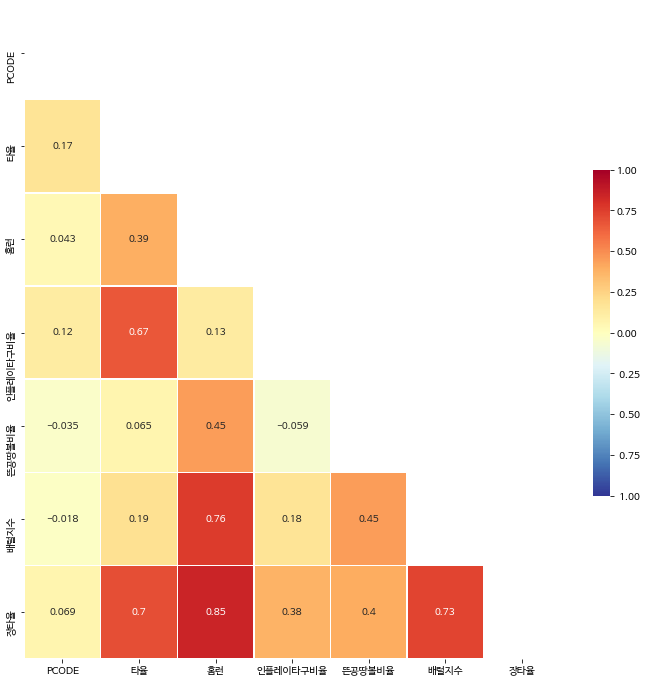

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df3.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(12,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [106]:
df1.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/1번/df1.csv')
df2.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/1번/df2.csv')
df3.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/1번/df3.csv')

#### 2)	연도별 가중치

18,19,20,21별 시계열 분석

장점 : 연도별 타자의 기록 변화의 경향성을 반영할 수 있다는 장점

In [117]:
d2018 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv', encoding = 'cp949')
d2019 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv', encoding = 'cp949')
d2020 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv', encoding = 'cp949')
d2021 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv', encoding = 'cp949')
# 18년, 19년, 20년, 21년 연도별 가중치
# 17.5%,  22.5%, 27.5%, 32.5%
df = pd.concat([d2018, d2019, d2020, d2021], ignore_index=True)
df.rename(columns={'HIT_VEL' : '타구속도', 'HIT_ANG_VER': "발사각도", 'PIT_VEL': '투구구속'}, inplace=True)
df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


In [134]:
df['뜬공'] = 0
df['땅볼'] = 0

for i in range(len(df)):
  if (df['HIT_RESULT'][i] == '플라이') | (df['HIT_RESULT'][i] == '파울플라이') | (df['HIT_RESULT'][i] == '인필드플라이') | (df['HIT_RESULT'][i] == '희생플라이'):
    df['뜬공'][i] = 1
  elif (df['HIT_RESULT'][i] =='땅볼아웃'):
    df['땅볼'][i] = 1

In [135]:
#배럴타구 예측
df['배럴지수'] = 0

for i in range(len(df)):
  a = float(df['타구속도'][i])
  b = float(df['발사각도'][i])
  if (148 <= a) & (a < 153) :
    if (-0.6 * a + 111.8 <= b) & (b < 1.6 * a - 209.8):
      df['배럴지수'][i] = 1
  elif (153 <= a) & (a < 158) :
    if (-0.6 * a + 111.8 <= b) & (b < (13/12) * a - 130.75):
      df['배럴지수'][i] = 1
  elif (158 <= a) & (a < 165) :
    if (-0.3125 * a + 66.375 <= b) & (b < (13/12) * a - 130.75):
      df['배럴지수'][i] = 1
  elif (165 <= a) & (a < 166) :
    if (-0.3125 * a + 66.375 <= b) & (b <= 48):
      df['배럴지수'][i] = 1
  elif (166 <= a) & (a < 169) :
    if (1.5 * a + 263.5 <= b) & (b <= 48):
      df['배럴지수'][i] = 1

In [140]:
df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,뜬공,땅볼,배럴지수
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,1,0,0
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척,0,0,0
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척,0,0,0
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척,0,0,0
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구,0,1,0
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구,0,0,0
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구,0,0,0
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구,0,0,0


In [141]:
float(df['뜬공'][0] * 0.225)

0.225

In [142]:
for i in range(len(df)):
  if df['GYEAR'][i] == 2018 :
    df['뜬공'][i] = df['뜬공'][i] * 175
    df['땅볼'][i] = df['땅볼'][i] * 175
    df['배럴지수'][i] = df['배럴지수'][i] * 175
  elif df['GYEAR'][i] == 2019 :
    df['뜬공'][i] = df['뜬공'][i] * 225
    df['땅볼'][i] = df['땅볼'][i] * 225
    df['배럴지수'][i] = df['배럴지수'][i] * 225
  elif df['GYEAR'][i] == 2020 :
    df['뜬공'][i] = df['뜬공'][i] * 275
    df['땅볼'][i] = df['땅볼'][i] * 275
    df['배럴지수'][i] = df['배럴지수'][i] * 275
  elif df['GYEAR'][i] == 2021 :
    df['뜬공'][i] = df['뜬공'][i] * 325
    df['땅볼'][i] = df['땅볼'][i] * 325
    df['배럴지수'][i] = df['배럴지수'][i] * 325

df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,뜬공,땅볼,배럴지수
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,175,0,0
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척,0,0,0
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척,0,0,0
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척,0,0,0
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구,0,325,0
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구,0,0,0
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구,0,0,0
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구,0,0,0


In [145]:
df['뜬공'] / 1000

0         0.175
1         0.000
2         0.000
3         0.000
4         0.000
          ...  
120740    0.000
120741    0.000
120742    0.000
120743    0.000
120744    0.325
Name: 뜬공, Length: 120745, dtype: float64

In [146]:
df['뜬공'] = df['뜬공'] / 250
df['땅볼'] = df['땅볼'] / 250
df['배럴지수'] = df['배럴지수'] / 250
df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,뜬공,땅볼,배럴지수
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,0.175,0.000,0
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척,0.000,0.000,0
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척,0.000,0.000,0
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척,0.000,0.000,0
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구,0.000,0.325,0
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구,0.000,0.000,0
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구,0.000,0.000,0
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구,0.000,0.000,0


In [157]:
score =pd.DataFrame(df.groupby(['PCODE']).sum())
score['뜬공땅볼비율'] = score['뜬공'] / score['땅볼']
score = score.drop(['배럴지수'], axis = 1)
score

,GYEAR,INN,타구속도,발사각도,투구구속,뜬공,땅볼,뜬공땅볼비율
PCODE,,,,,,,,
50054,111113,314,7135.51,953.7,7365.72,28.3,14.2,1.992958
50066,34340,114,2302.05,263.9,2328.85,5.5,4.4,1.250000
50150,60608,158,3654.30,660.0,4049.83,14.2,4.8,2.958333
50165,822273,1981,58212.01,9784.4,55587.34,187.0,83.5,2.239521
50167,12126,36,806.96,230.0,814.81,6.5,0.0,inf
...,...,...,...,...,...,...,...,...
79530,62581,172,3883.10,562.3,4159.94,8.4,4.5,1.866667
79608,2402839,5731,160511.50,21264.1,161343.52,404.2,225.4,1.793256
79705,260409,711,16699.54,2964.5,17473.82,41.9,21.4,1.957944


In [159]:
score2 =pd.DataFrame(df.groupby(['PCODE']).mean())
score['배럴지수'] = score2['배럴지수']
score = score.reset_index()
score

,PCODE,GYEAR,INN,타구속도,발사각도,투구구속,뜬공,땅볼,뜬공땅볼비율,배럴지수
0,50054,111113,314,7135.51,953.7,7365.72,28.3,14.2,1.992958,0.000000
1,50066,34340,114,2302.05,263.9,2328.85,5.5,4.4,1.250000,0.000000
2,50150,60608,158,3654.30,660.0,4049.83,14.2,4.8,2.958333,0.000000
3,50165,822273,1981,58212.01,9784.4,55587.34,187.0,83.5,2.239521,0.182801
4,50167,12126,36,806.96,230.0,814.81,6.5,0.0,inf,0.000000
...,...,...,...,...,...,...,...,...,...,...
432,79530,62581,172,3883.10,562.3,4159.94,8.4,4.5,1.866667,0.000000
433,79608,2402839,5731,160511.50,21264.1,161343.52,404.2,225.4,1.793256,0.035714
434,79705,260409,711,16699.54,2964.5,17473.82,41.9,21.4,1.957944,0.021705
435,99606,240142,657,15989.35,1564.5,16005.96,20.3,18.9,1.074074,0.029412


In [160]:
df = pd.read_csv('/content/drive/MyDrive/빅콘테스트/df_with_barrel.csv', index_col=0)
df = pd.merge(df, score, on='PCODE')
df = df[['PCODE', '배럴지수', '타석', '타수', '타율', '안타', '홈런', '루타', '장타율', '희생플라이', '볼넷', '삼진', '고의4구', '사구', '병살타', '출루율', '인플레이타구비율', '뜬공땅볼비율', 'OPS']]
df

,PCODE,배럴지수,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,인플레이타구비율,뜬공땅볼비율,OPS
0,50054,0.000000,52.500000,47.0,0.2015,9.500000,0.000000,11.000000,0.223000,0.000000,4.000000,10.000000,0.00,1.500000,0.0,0.285714,0.256757,1.992958,0.508714
1,50066,0.000000,32.000000,30.0,0.2000,6.000000,1.000000,11.000000,0.367000,0.000000,2.000000,11.000000,0.00,0.000000,1.0,0.250000,0.277778,1.250000,0.617000
2,50150,0.000000,21.500000,20.0,0.2335,6.000000,0.000000,7.000000,0.266500,0.000000,1.000000,4.000000,0.00,0.500000,1.0,0.348837,0.375000,2.958333,0.615337
3,50165,0.182801,349.500000,308.0,0.2605,82.500000,23.000000,166.500000,0.507000,2.000000,36.500000,89.500000,2.50,3.000000,4.5,0.353693,0.307494,2.239521,0.860693
4,50167,0.000000,19.000000,16.0,0.1250,2.000000,0.000000,2.000000,0.125000,0.000000,1.000000,7.000000,0.00,1.000000,0.0,0.222222,0.222222,inf,0.347222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,79530,0.000000,32.000000,29.0,0.2110,5.000000,0.000000,7.000000,0.305500,0.500000,1.500000,10.000000,0.00,0.000000,2.0,0.209677,0.270270,1.866667,0.515177
433,79608,0.035714,415.750000,370.0,0.3170,117.500000,10.250000,174.750000,0.467250,5.250000,34.250000,43.250000,1.25,4.500000,9.5,0.379290,0.344578,1.793256,0.846540
434,79705,0.021705,81.333333,69.0,0.2190,16.333333,2.333333,26.666667,0.345667,0.666667,8.333333,18.666667,0.00,1.333333,2.0,0.327731,0.295775,1.957944,0.673398
435,99606,0.029412,205.000000,183.0,0.2950,54.000000,4.000000,77.000000,0.421000,1.000000,16.000000,49.000000,1.00,5.000000,5.0,0.368932,0.387597,1.074074,0.789932


In [161]:
#2021시즌 팀별 평균적으로 75경기 수행
QAB = (144*3.1 * 3/4) + (75 * 3.1 * 1/4)
QAB = QAB * 0.4
QAB

157.17000000000002

In [162]:
remove_index = df['타석'] < QAB
df =df[~remove_index]
df

,PCODE,배럴지수,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,인플레이타구비율,뜬공땅볼비율,OPS
3,50165,0.182801,349.50,308.0,0.26050,82.50,23.00,166.50,0.50700,2.00,36.50,89.50,2.50,3.0,4.5,0.353693,0.307494,2.239521,0.860693
11,50350,0.068750,271.00,244.0,0.25400,62.00,2.00,82.00,0.33600,3.00,22.00,37.00,1.00,2.0,6.0,0.319853,0.297030,1.897436,0.655853
14,50458,0.000000,241.50,213.0,0.24950,52.50,1.00,61.50,0.29300,2.50,18.50,32.50,0.00,1.0,0.5,0.306383,0.290960,1.101408,0.599383
15,50468,0.119277,163.00,132.0,0.28000,37.00,6.00,63.00,0.47700,1.00,23.00,41.00,0.00,7.0,3.0,0.411043,0.369048,1.625000,0.888043
16,50469,0.086087,217.00,196.0,0.20900,41.00,8.00,72.00,0.36700,3.00,18.00,58.00,0.00,0.0,5.0,0.271889,0.259843,1.629630,0.638889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,79402,0.021220,447.75,390.5,0.26225,104.75,5.25,138.25,0.34375,2.25,40.50,59.75,0.50,8.5,12.0,0.348785,0.307811,1.346857,0.692535
430,79456,0.003962,239.50,218.0,0.30200,65.75,0.75,76.75,0.35425,1.00,14.00,23.50,1.00,2.5,7.5,0.352008,0.337224,0.826477,0.706258
433,79608,0.035714,415.75,370.0,0.31700,117.50,10.25,174.75,0.46725,5.25,34.25,43.25,1.25,4.5,9.5,0.379290,0.344578,1.793256,0.846540
435,99606,0.029412,205.00,183.0,0.29500,54.00,4.00,77.00,0.42100,1.00,16.00,49.00,1.00,5.0,5.0,0.368932,0.387597,1.074074,0.789932


In [163]:
df['볼넷삼진비율'] = df['볼넷'] / df['삼진']
df1 = df[['PCODE', '배럴지수', '뜬공땅볼비율', '장타율']]
df2 = df[['PCODE', '배럴지수', '뜬공땅볼비율', '홈런', '장타율']]
df3 = df[['PCODE', '타율', '홈런', '인플레이타구비율', '뜬공땅볼비율', '배럴지수', '장타율']]
df3

,PCODE,타율,홈런,인플레이타구비율,뜬공땅볼비율,배럴지수,장타율
3,50165,0.26050,23.00,0.307494,2.239521,0.182801,0.50700
11,50350,0.25400,2.00,0.297030,1.897436,0.068750,0.33600
14,50458,0.24950,1.00,0.290960,1.101408,0.000000,0.29300
15,50468,0.28000,6.00,0.369048,1.625000,0.119277,0.47700
16,50469,0.20900,8.00,0.259843,1.629630,0.086087,0.36700
...,...,...,...,...,...,...,...
428,79402,0.26225,5.25,0.307811,1.346857,0.021220,0.34375
430,79456,0.30200,0.75,0.337224,0.826477,0.003962,0.35425
433,79608,0.31700,10.25,0.344578,1.793256,0.035714,0.46725
435,99606,0.29500,4.00,0.387597,1.074074,0.029412,0.42100


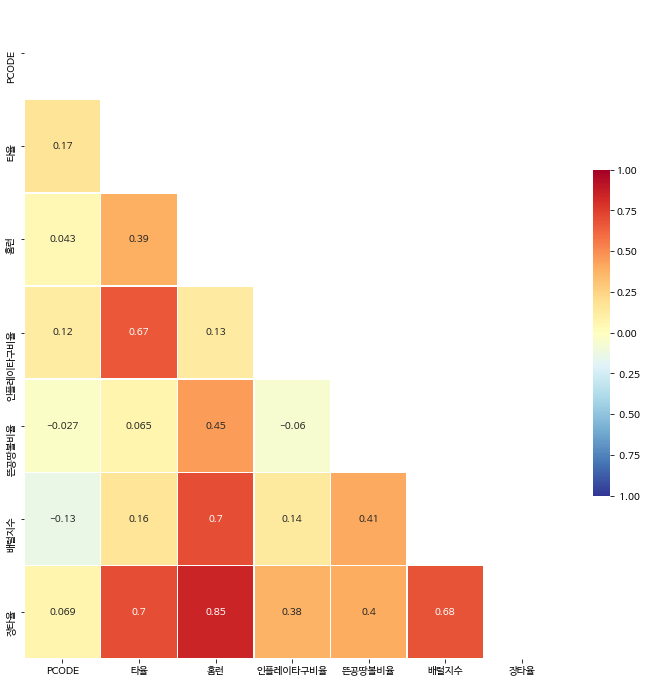

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df3.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(12,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [165]:
df1.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/2번/df1.csv')
df2.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/2번/df2.csv')
df3.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/2번/df3.csv')

#### 3) 	연도별 값 따로
18년의 배럴타구, 홈런, 뜬공땅볼비율, 타율 평균값	18년 장타율 예측

19년의 배럴타구, 홈런, 뜬공땅볼비율, 타율 평균값	19년 장타율 예측

20년의 배럴타구, 홈런, 뜬공땅볼비율, 타율 평균값	20년 장타율 예측

21년의 배럴타구, 홈런, 뜬공땅볼비율, 타율 평균값	21년 장타율 예측
	
장점 : 타자의 기록은 다양한 요인으로 인해 연도별로 크게 달라질 수 있음을 반영,    데이터셋 증가

In [172]:
h2018 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv', encoding='cp949')
h2019 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv', encoding='cp949')
h2020 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv', encoding='cp949')
h2021 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021.csv', encoding='cp949')
h2018.rename(columns={'PA':'타석', 'AB':'타수', 'BA':'타율', 'HIT':'안타', 'HR':'홈런', 'TOTB':'루타', 'SLG':'장타율', 'SF':'희생플라이', 'BB':'볼넷', 'KK':'삼진', 'IB': '고의4구', 'HP':'사구', 'GD':'병살타'}, inplace=True)
h2019.rename(columns={'PA':'타석', 'AB':'타수', 'BA':'타율', 'HIT':'안타', 'HR':'홈런', 'TOTB':'루타', 'SLG':'장타율', 'SF':'희생플라이', 'BB':'볼넷', 'KK':'삼진', 'IB': '고의4구', 'HP':'사구', 'GD':'병살타'}, inplace=True)
h2020.rename(columns={'PA':'타석', 'AB':'타수', 'BA':'타율', 'HIT':'안타', 'HR':'홈런', 'TOTB':'루타', 'SLG':'장타율', 'SF':'희생플라이', 'BB':'볼넷', 'KK':'삼진', 'IB': '고의4구', 'HP':'사구', 'GD':'병살타'}, inplace=True)
h2021.rename(columns={'PA':'타석', 'AB':'타수', 'BA':'타율', 'HIT':'안타', 'HR':'홈런', 'TOTB':'루타', 'SLG':'장타율', 'SF':'희생플라이', 'BB':'볼넷', 'KK':'삼진', 'IB': '고의4구', 'HP':'사구', 'GD':'병살타'}, inplace=True)
h2018

,GYEAR,PCODE,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2018,79530,21,15,14,0.286,4,0,6,0.429,0,1,5,0,0,1
271,2018,79608,130,549,494,0.342,169,23,278,0.563,9,36,57,1,10,13
272,2018,79705,58,102,85,0.259,22,4,39,0.459,0,11,26,0,3,3
273,2018,99606,88,205,183,0.295,54,4,77,0.421,1,16,49,1,5,5


In [176]:
out_index1 = h2018['타석'] < 446*0.4
out_index2 = h2019['타석'] < 446*0.4
out_index3 = h2020['타석'] < 446*0.4
out_index4 = h2021['타석'] < 75*3.1*0.4

h2018 = h2018[~out_index1]
h2019 = h2019[~out_index2]
h2020 = h2020[~out_index3]
h2021 = h2021[~out_index4]

In [177]:
hitter = pd.concat([h2018, h2019, h2020, h2021], ignore_index=True)
hitter

,GYEAR,PCODE,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타
0,2018,60523,91,194,174,0.305,53,7,86,0.494,3,16,39,1,1,4
1,2018,60558,128,374,342,0.254,87,12,144,0.421,1,24,92,0,4,7
2,2018,60566,114,204,187,0.251,47,0,49,0.262,0,8,15,0,2,8
3,2018,61102,132,465,425,0.296,126,19,216,0.508,1,28,80,1,9,21
4,2018,61186,112,405,359,0.340,122,2,156,0.435,2,39,48,2,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,2021,79240,69,301,279,0.323,90,4,122,0.437,1,18,19,1,3,12
462,2021,79365,73,261,219,0.265,58,16,117,0.534,1,32,69,0,6,5
463,2021,79402,70,278,237,0.211,50,1,61,0.257,0,30,26,0,3,7
464,2021,79456,62,135,124,0.274,34,0,38,0.306,2,7,11,1,1,5


In [178]:
hitter['PCODE_YEAR'] = ' '
for i in range(len(hitter)):
  hitter['PCODE_YEAR'][i] = str(hitter['PCODE'][i]) + '_' + str(hitter['GYEAR'][i])
hitter

,GYEAR,PCODE,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,PCODE_YEAR
0,2018,60523,91,194,174,0.305,53,7,86,0.494,3,16,39,1,1,4,60523_2018
1,2018,60558,128,374,342,0.254,87,12,144,0.421,1,24,92,0,4,7,60558_2018
2,2018,60566,114,204,187,0.251,47,0,49,0.262,0,8,15,0,2,8,60566_2018
3,2018,61102,132,465,425,0.296,126,19,216,0.508,1,28,80,1,9,21,61102_2018
4,2018,61186,112,405,359,0.340,122,2,156,0.435,2,39,48,2,3,11,61186_2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,2021,79240,69,301,279,0.323,90,4,122,0.437,1,18,19,1,3,12,79240_2021
462,2021,79365,73,261,219,0.265,58,16,117,0.534,1,32,69,0,6,5,79365_2021
463,2021,79402,70,278,237,0.211,50,1,61,0.257,0,30,26,0,3,7,79402_2021
464,2021,79456,62,135,124,0.274,34,0,38,0.306,2,7,11,1,1,5,79456_2021


In [179]:
hitter = hitter.groupby(hitter.PCODE_YEAR).mean()
hitter

,GYEAR,PCODE,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타
PCODE_YEAR,,,,,,,,,,,,,,,,
50165_2020,2020,50165,117,494,431,0.278,120,38,255,0.592,4,55,136,5,4,7
50165_2021,2021,50165,51,205,185,0.243,45,8,78,0.422,0,18,43,0,2,2
50350_2020,2020,50350,65,271,244,0.254,62,2,82,0.336,3,22,37,1,2,6
50458_2020,2020,50458,135,287,254,0.232,59,1,69,0.272,2,24,44,0,2,1
50458_2021,2021,50458,68,196,172,0.267,46,1,54,0.314,3,13,21,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79608_2019,2019,79608,105,408,362,0.315,114,5,149,0.412,5,40,37,1,1,9
79608_2020,2020,79608,124,460,412,0.286,118,8,170,0.413,2,35,47,2,7,11
79608_2021,2021,79608,55,246,212,0.325,69,5,102,0.481,5,26,32,1,0,5


In [180]:
hitter['출루율'] = (hitter['안타'] + hitter['사구'] + hitter['고의4구'] + hitter['볼넷']) / (hitter['타수'] + hitter['사구'] + hitter['고의4구'] + hitter['볼넷'] + hitter['희생플라이'])
hitter['OPS'] = hitter['장타율'] + hitter['출루율']
hitter['인플레이타구비율'] = (hitter['안타'] - hitter['홈런']) / (hitter['타수'] - hitter['삼진'] - hitter['홈런'] - hitter['희생플라이'])
hitter

,GYEAR,PCODE,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,OPS,인플레이타구비율
PCODE_YEAR,,,,,,,,,,,,,,,,,,,
50165_2020,2020,50165,117,494,431,0.278,120,38,255,0.592,4,55,136,5,4,7,0.368737,0.960737,0.324111
50165_2021,2021,50165,51,205,185,0.243,45,8,78,0.422,0,18,43,0,2,2,0.317073,0.739073,0.276119
50350_2020,2020,50350,65,271,244,0.254,62,2,82,0.336,3,22,37,1,2,6,0.319853,0.655853,0.297030
50458_2020,2020,50458,135,287,254,0.232,59,1,69,0.272,2,24,44,0,2,1,0.301418,0.573418,0.280193
50458_2021,2021,50458,68,196,172,0.267,46,1,54,0.314,3,13,21,0,0,0,0.313830,0.627830,0.306122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79608_2019,2019,79608,105,408,362,0.315,114,5,149,0.412,5,40,37,1,1,9,0.381418,0.793418,0.346032
79608_2020,2020,79608,124,460,412,0.286,118,8,170,0.413,2,35,47,2,7,11,0.353712,0.766712,0.309859
79608_2021,2021,79608,55,246,212,0.325,69,5,102,0.481,5,26,32,1,0,5,0.393443,0.874443,0.376471


In [181]:
hitter = hitter.reset_index()
hitter

,PCODE_YEAR,GYEAR,PCODE,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,OPS,인플레이타구비율
0,50165_2020,2020,50165,117,494,431,0.278,120,38,255,0.592,4,55,136,5,4,7,0.368737,0.960737,0.324111
1,50165_2021,2021,50165,51,205,185,0.243,45,8,78,0.422,0,18,43,0,2,2,0.317073,0.739073,0.276119
2,50350_2020,2020,50350,65,271,244,0.254,62,2,82,0.336,3,22,37,1,2,6,0.319853,0.655853,0.297030
3,50458_2020,2020,50458,135,287,254,0.232,59,1,69,0.272,2,24,44,0,2,1,0.301418,0.573418,0.280193
4,50458_2021,2021,50458,68,196,172,0.267,46,1,54,0.314,3,13,21,0,0,0,0.313830,0.627830,0.306122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,79608_2019,2019,79608,105,408,362,0.315,114,5,149,0.412,5,40,37,1,1,9,0.381418,0.793418,0.346032
462,79608_2020,2020,79608,124,460,412,0.286,118,8,170,0.413,2,35,47,2,7,11,0.353712,0.766712,0.309859
463,79608_2021,2021,79608,55,246,212,0.325,69,5,102,0.481,5,26,32,1,0,5,0.393443,0.874443,0.376471
464,99606_2018,2018,99606,88,205,183,0.295,54,4,77,0.421,1,16,49,1,5,5,0.368932,0.789932,0.387597


In [182]:
d2018 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv', encoding = 'cp949')
d2019 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv', encoding = 'cp949')
d2020 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv', encoding = 'cp949')
d2021 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv', encoding = 'cp949')
df = pd.concat([d2018, d2019, d2020, d2021], ignore_index=True)
df.rename(columns={'HIT_VEL' : '타구속도', 'HIT_ANG_VER': "발사각도", 'PIT_VEL': '투구구속'}, inplace=True)
df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


In [183]:
df['PCODE_YEAR'] = ' '
for i in range(len(df)):
  df['PCODE_YEAR'][i] = str(df['PCODE'][i]) + '_' + str(df['GYEAR'][i])
df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,PCODE_YEAR
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,62797_2018
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척,76753_2018
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척,71752_2018
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척,62700_2018
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척,68730_2018
...,...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구,50458_2021
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구,62415_2021
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구,75566_2021
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구,69418_2021


In [184]:
df['뜬공'] = 0
df['땅볼'] = 0

for i in range(len(df)):
  if (df['HIT_RESULT'][i] == '플라이') | (df['HIT_RESULT'][i] == '파울플라이') | (df['HIT_RESULT'][i] == '인필드플라이') | (df['HIT_RESULT'][i] == '희생플라이'):
    df['뜬공'][i] = 1
  elif (df['HIT_RESULT'][i] =='땅볼아웃'):
    df['땅볼'][i] = 1

df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,PCODE_YEAR,뜬공,땅볼
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,62797_2018,1,0
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척,76753_2018,0,0
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척,71752_2018,0,0
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척,62700_2018,0,0
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척,68730_2018,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구,50458_2021,0,1
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구,62415_2021,0,0
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구,75566_2021,0,0
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구,69418_2021,0,0


In [185]:
#배럴타구 예측
df['배럴지수'] = 0

for i in range(len(df)):
  a = float(df['타구속도'][i])
  b = float(df['발사각도'][i])
  if (148 <= a) & (a < 153) :
    if (-0.6 * a + 111.8 <= b) & (b < 1.6 * a - 209.8):
      df['배럴지수'][i] = 1
  elif (153 <= a) & (a < 158) :
    if (-0.6 * a + 111.8 <= b) & (b < (13/12) * a - 130.75):
      df['배럴지수'][i] = 1
  elif (158 <= a) & (a < 165) :
    if (-0.3125 * a + 66.375 <= b) & (b < (13/12) * a - 130.75):
      df['배럴지수'][i] = 1
  elif (165 <= a) & (a < 166) :
    if (-0.3125 * a + 66.375 <= b) & (b <= 48):
      df['배럴지수'][i] = 1
  elif (166 <= a) & (a < 169) :
    if (1.5 * a + 263.5 <= b) & (b <= 48):
      df['배럴지수'][i] = 1

In [191]:
score =pd.DataFrame(df.groupby(['PCODE_YEAR']).sum())
score['뜬공땅볼비율'] = score['뜬공'] / score['땅볼']
score = score.drop(['배럴지수'], axis = 1)
score

,GYEAR,PCODE,INN,타구속도,발사각도,투구구속,뜬공,땅볼,뜬공땅볼비율
PCODE_YEAR,,,,,,,,,
50054_2020,84840,2102268,239,5487.67,832.0,5662.26,21,7,3.000000
50054_2021,26273,650702,75,1647.84,121.7,1703.46,4,5,0.800000
50066_2020,34340,851122,114,2302.05,263.9,2328.85,5,4,1.250000
50150_2020,44440,1103300,116,2774.62,471.3,2973.26,7,2,3.500000
50150_2021,16168,401200,42,879.68,188.7,1076.57,5,2,2.500000
...,...,...,...,...,...,...,...,...,...
79705_2018,104936,4144660,278,6815.53,1086.5,7013.49,16,11,1.454545
79705_2019,135273,5340235,377,8646.06,1683.3,9152.98,28,14,2.000000
79705_2020,20200,797050,56,1237.95,194.7,1307.35,5,1,5.000000


In [192]:
score2 =pd.DataFrame(df.groupby(['PCODE_YEAR']).mean())
score['배럴지수'] = score2['배럴지수']
score = score.reset_index()
score

,PCODE_YEAR,GYEAR,PCODE,INN,타구속도,발사각도,투구구속,뜬공,땅볼,뜬공땅볼비율,배럴지수
0,50054_2020,84840,2102268,239,5487.67,832.0,5662.26,21,7,3.000000,0.000000
1,50054_2021,26273,650702,75,1647.84,121.7,1703.46,4,5,0.800000,0.000000
2,50066_2020,34340,851122,114,2302.05,263.9,2328.85,5,4,1.250000,0.000000
3,50150_2020,44440,1103300,116,2774.62,471.3,2973.26,7,2,3.500000,0.000000
4,50150_2021,16168,401200,42,879.68,188.7,1076.57,5,2,2.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1060,79705_2018,104936,4144660,278,6815.53,1086.5,7013.49,16,11,1.454545,0.076923
1061,79705_2019,135273,5340235,377,8646.06,1683.3,9152.98,28,14,2.000000,0.000000
1062,79705_2020,20200,797050,56,1237.95,194.7,1307.35,5,1,5.000000,0.000000
1063,99606_2018,240142,11853114,657,15989.35,1564.5,16005.96,29,27,1.074074,0.042017


In [195]:
hitter

,PCODE_YEAR,GYEAR,PCODE,GAMENUM,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,OPS,인플레이타구비율
0,50165_2020,2020,50165,117,494,431,0.278,120,38,255,0.592,4,55,136,5,4,7,0.368737,0.960737,0.324111
1,50165_2021,2021,50165,51,205,185,0.243,45,8,78,0.422,0,18,43,0,2,2,0.317073,0.739073,0.276119
2,50350_2020,2020,50350,65,271,244,0.254,62,2,82,0.336,3,22,37,1,2,6,0.319853,0.655853,0.297030
3,50458_2020,2020,50458,135,287,254,0.232,59,1,69,0.272,2,24,44,0,2,1,0.301418,0.573418,0.280193
4,50458_2021,2021,50458,68,196,172,0.267,46,1,54,0.314,3,13,21,0,0,0,0.313830,0.627830,0.306122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,79608_2019,2019,79608,105,408,362,0.315,114,5,149,0.412,5,40,37,1,1,9,0.381418,0.793418,0.346032
462,79608_2020,2020,79608,124,460,412,0.286,118,8,170,0.413,2,35,47,2,7,11,0.353712,0.766712,0.309859
463,79608_2021,2021,79608,55,246,212,0.325,69,5,102,0.481,5,26,32,1,0,5,0.393443,0.874443,0.376471
464,99606_2018,2018,99606,88,205,183,0.295,54,4,77,0.421,1,16,49,1,5,5,0.368932,0.789932,0.387597


In [196]:
df = pd.merge(score, hitter, on='PCODE_YEAR')
df = df[['PCODE_YEAR', '배럴지수', '타석', '타수', '타율', '안타', '홈런', '루타', '장타율', '희생플라이', '볼넷', '삼진', '고의4구', '사구', '병살타', '출루율', '인플레이타구비율', '뜬공땅볼비율', 'OPS']]
df

,PCODE_YEAR,배럴지수,타석,타수,타율,안타,홈런,루타,장타율,희생플라이,볼넷,삼진,고의4구,사구,병살타,출루율,인플레이타구비율,뜬공땅볼비율,OPS
0,50165_2020,0.160584,494,431,0.278,120,38,255,0.592,4,55,136,5,4,7,0.368737,0.324111,2.386364,0.960737
1,50165_2021,0.150376,205,185,0.243,45,8,78,0.422,0,18,43,0,2,2,0.317073,0.276119,2.037037,0.739073
2,50350_2020,0.062500,271,244,0.254,62,2,82,0.336,3,22,37,1,2,6,0.319853,0.297030,1.897436,0.655853
3,50458_2020,0.000000,287,254,0.232,59,1,69,0.272,2,24,44,0,2,1,0.301418,0.280193,1.239130,0.573418
4,50458_2021,0.000000,196,172,0.267,46,1,54,0.314,3,13,21,0,0,0,0.313830,0.306122,0.976744,0.627830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,79608_2019,0.020619,408,362,0.315,114,5,149,0.412,5,40,37,1,1,9,0.381418,0.346032,1.666667,0.793418
462,79608_2020,0.028571,460,412,0.286,118,8,170,0.413,2,35,47,2,7,11,0.353712,0.309859,2.203390,0.766712
463,79608_2021,0.048193,246,212,0.325,69,5,102,0.481,5,26,32,1,0,5,0.393443,0.376471,1.268293,0.874443
464,99606_2018,0.042017,205,183,0.295,54,4,77,0.421,1,16,49,1,5,5,0.368932,0.387597,1.074074,0.789932


In [198]:
df['볼넷삼진비율'] = df['볼넷'] / df['삼진']
df1 = df[['PCODE_YEAR', '배럴지수', '뜬공땅볼비율', '장타율']]
df2 = df[['PCODE_YEAR', '배럴지수', '뜬공땅볼비율', '홈런', '장타율']]
df3 = df[['PCODE_YEAR', '타율', '홈런', '인플레이타구비율', '뜬공땅볼비율', '배럴지수', '장타율']]
df3

,PCODE_YEAR,타율,홈런,인플레이타구비율,뜬공땅볼비율,배럴지수,장타율
0,50165_2020,0.278,38,0.324111,2.386364,0.160584,0.592
1,50165_2021,0.243,8,0.276119,2.037037,0.150376,0.422
2,50350_2020,0.254,2,0.297030,1.897436,0.062500,0.336
3,50458_2020,0.232,1,0.280193,1.239130,0.000000,0.272
4,50458_2021,0.267,1,0.306122,0.976744,0.000000,0.314
...,...,...,...,...,...,...,...
461,79608_2019,0.315,5,0.346032,1.666667,0.020619,0.412
462,79608_2020,0.286,8,0.309859,2.203390,0.028571,0.413
463,79608_2021,0.325,5,0.376471,1.268293,0.048193,0.481
464,99606_2018,0.295,4,0.387597,1.074074,0.042017,0.421


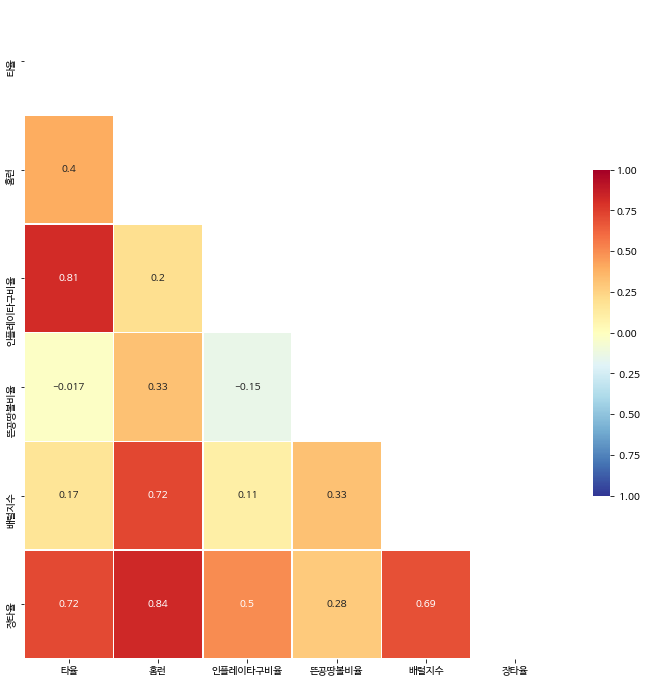

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df3.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(12,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [200]:
df1.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/3번/df1.csv')
df2.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/3번/df2.csv')
df3.to_csv('/content/drive/MyDrive/빅콘테스트/Train_dataset/3번/df3.csv')